In [28]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

data = pd.read_excel('Ice_Cream_logs_excel.xlsx', sheet_name='Interarrival')
data

,Customer ID,Event name,Time,iat
0,1,Arrival,12:25:15,0.0
1,2,Arrival,12:26:36,81.0
2,1,Arrival,12:27:55,79.0
3,2,Arrival,12:29:49,114.0
4,3,Arrival,12:30:04,15.0
...,...,...,...,...
73,70,Arrival,17:51:04,1.0
74,71,Arrival,17:51:05,1.0
75,72,Arrival,17:51:14,9.0
76,73,Arrival,17:52:11,57.0


In [29]:
# --------------------------------------------    NON-PEAK HOURS    ---------------------------------------------------        
# Extract only the 'Arrival' events (before 17:00:00)
np_arrival_times = data[data['Time'] < pd.to_datetime('17:00:00', format='%H:%M:%S').time()].copy()

# ------------------------------------------------    PEAK HOURS    ---------------------------------------------------        
# Extract only the 'Arrival' events (after 17:00:00)
p_arrival_times = data[data['Time'] >= pd.to_datetime('17:00:00', format='%H:%M:%S').time()].copy()

# Display the results
print("Non-Peak Arrival Times:")
print(np_arrival_times)

print("\nPeak Arrival Times:")
print(p_arrival_times)

Non-Peak Arrival Times:
    Customer ID Event name      Time    iat
0             1    Arrival  12:25:15    0.0
1             2    Arrival  12:26:36   81.0
2             1    Arrival  12:27:55   79.0
3             2    Arrival  12:29:49  114.0
4             3    Arrival  12:30:04   15.0
5             4    Arrival  12:30:12    8.0
6             5    Arrival  12:31:16   64.0
7             6    Arrival  12:31:17    1.0
8             8    Arrival  12:32:16   59.0
9             9    Arrival  12:33:54   98.0
10           10    Arrival  12:35:01   67.0
11           12    Arrival  12:36:19   78.0
12           13    Arrival  12:36:42   23.0
13           14    Arrival  12:37:26   44.0
14           16    Arrival  12:37:33    7.0
15           17    Arrival  12:39:22  109.0
16           18    Arrival  12:40:45   83.0
17           19    Arrival  12:42:39  114.0
18           20    Arrival  12:42:40    1.0
19           21    Arrival  12:44:12   92.0
20           22    Arrival  12:46:02  110.0
21      

In [30]:
from scipy.stats import ks_2samp

# Assuming sample_1 and sample_2 are your inter-arrival times for non-peak and peak times
sample_1 = np_arrival_times['iat']
sample_2 = p_arrival_times['iat']

# Perform the two-sample KS test
ks_statistic, p_value = ks_2samp(sample_1, sample_2)

print(f'Two-sample KS Statistic: {ks_statistic}')
print(f'p-value: {p_value}')

# Interpretation
if p_value < 0.05:
    print("The two samples have significantly different inter-arrival times (reject null hypothesis).")
else:
    print("The two samples do not have significantly different inter-arrival times (fail to reject null hypothesis).")


Two-sample KS Statistic: 0.31456720619282197
p-value: 0.041597909303012826
The two samples have significantly different inter-arrival times (reject null hypothesis).


In [31]:
# List of distributions to test
list_of_potential_distributions = [
    stats.expon, stats.norm, stats.uniform, stats.gamma]

significance_level = 0.05

results = {}
for dist in list_of_potential_distributions:

    #fit the data to the distribution, and get the parameters, in this case we're using the maximum likelihood estimation (mle)
    dist_parameters = dist.fit(data['iat'], method='mle')

    #evaluate with the kolmogorov-smirnov test
    test_result = stats.kstest(data['iat'], dist.name, args=dist_parameters)

    #save the test results and the parameters
    results[dist.name] = {'test': test_result, 'params': dist_parameters}

    if test_result.pvalue < significance_level:
        print(f'{dist.name} is a "poor" fit, p-value: {test_result.pvalue}')
    else:
        print(f'{dist.name} is a "good" fit, p-value: {test_result.pvalue}, with parameters: {dist_parameters}')

expon is a "poor" fit, p-value: 0.0016349319900639259
norm is a "good" fit, p-value: 0.12742097168801336, with parameters: (np.float64(49.02564102564109), np.float64(43.28793707701923))
uniform is a "poor" fit, p-value: 1.1300410796277426e-07
gamma is a "poor" fit, p-value: 3.6731053358258995e-07


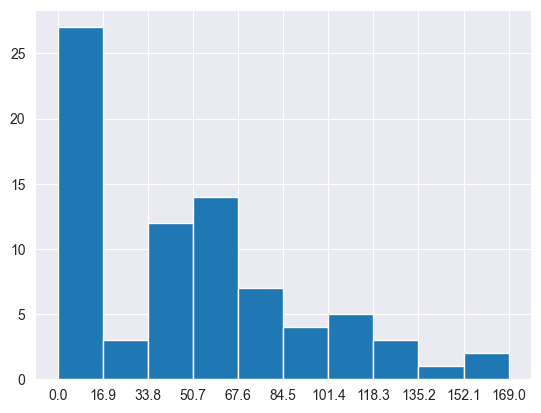

In [32]:
#Create a histogram (or density plot) of the inter-arrival times
plt.hist(data['iat'])
plt.xticks(np.histogram_bin_edges(data['iat']))
plt.show()

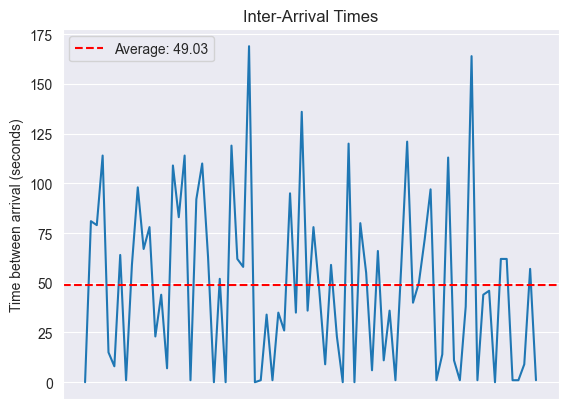

In [33]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data_plot = pd.DataFrame({'Index': data.index, 'Time between arrival': data['iat']})

# average
avg = data['iat'].mean()

# Create the line plot
sns.lineplot(x='Index', y='Time between arrival', data=data_plot)
plt.axhline(avg, color='red', linestyle='--', label=f'Average: {avg:.2f}')
plt.xlabel('')
plt.xticks([])  # Hide x-ticks
plt.ylabel('Time between arrival (seconds)')
plt.title('Inter-Arrival Times')
plt.legend()
plt.show()

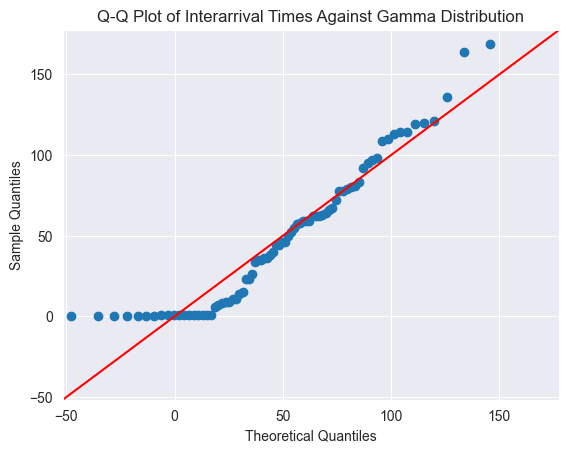

In [34]:
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

# Fit the gamma distribution to the interarrival times
norm_mean, norm_std = stats.norm.fit(data['iat'])

# Generate a Q-Q plot
sm.qqplot(data['iat'], dist=stats.norm, line='45', loc=norm_mean, scale=norm_std)

plt.title('Q-Q Plot of Interarrival Times Against Gamma Distribution')
plt.show()


In [35]:
# List of distributions to test
list_of_potential_distributions = [
    stats.expon, stats.norm, stats.uniform, stats.gamma]

significance_level = 0.05

results = {}
for dist in list_of_potential_distributions:

    #fit the data to the distribution, and get the parameters, in this case we're using the maximum likelihood estimation (mle)
    dist_parameters = dist.fit(np_arrival_times['iat'], method='mle')

    #evaluate with the kolmogorov-smirnov test
    test_result = stats.kstest(np_arrival_times['iat'], dist.name, args=dist_parameters)

    #save the test results and the parameters
    results[dist.name] = {'test': test_result, 'params': dist_parameters}

    if test_result.pvalue < significance_level:
        print(f'{dist.name} is a "poor" fit, p-value: {test_result.pvalue}')
    else:
        print(f'{dist.name} is a "good" fit, p-value: {test_result.pvalue}, with parameters: {dist_parameters}')

expon is a "good" fit, p-value: 0.070147070137773, with parameters: (0.0, 61.03448275862064)
norm is a "good" fit, p-value: 0.7021717467132342, with parameters: (np.float64(61.03448275862064), np.float64(44.434750891632255))
uniform is a "poor" fit, p-value: 0.030886032227450233
gamma is a "good" fit, p-value: 0.6165126664298728, with parameters: (np.float64(10.510831753349414), np.float64(-85.93422552845433), np.float64(13.98063792578579))


In [36]:
# List of distributions to test
list_of_potential_distributions = [
    stats.expon, stats.norm, stats.uniform, stats.gamma]

significance_level = 0.05

results = {}
for dist in list_of_potential_distributions:

    #fit the data to the distribution, and get the parameters, in this case we're using the maximum likelihood estimation (mle)
    dist_parameters = dist.fit(p_arrival_times['iat'], method='mle')

    #evaluate with the kolmogorov-smirnov test
    test_result = stats.kstest(p_arrival_times['iat'], dist.name, args=dist_parameters)

    #save the test results and the parameters
    results[dist.name] = {'test': test_result, 'params': dist_parameters}

    if test_result.pvalue < significance_level:
        print(f'{dist.name} is a "poor" fit, p-value: {test_result.pvalue}')
    else:
        print(f'{dist.name} is a "good" fit, p-value: {test_result.pvalue}, with parameters: {dist_parameters}')

expon is a "poor" fit, p-value: 0.0052626781642844955
norm is a "good" fit, p-value: 0.18103128572786642, with parameters: (np.float64(41.91836734693892), np.float64(40.968796854457786))
uniform is a "poor" fit, p-value: 1.7059341963708335e-07
gamma is a "poor" fit, p-value: 2.0322055704779653e-06


Non-Peak - Mean: 61.03448275862064, Std: 44.434750891632255
Peak - Mean: 41.91836734693892, Std: 40.968796854457786


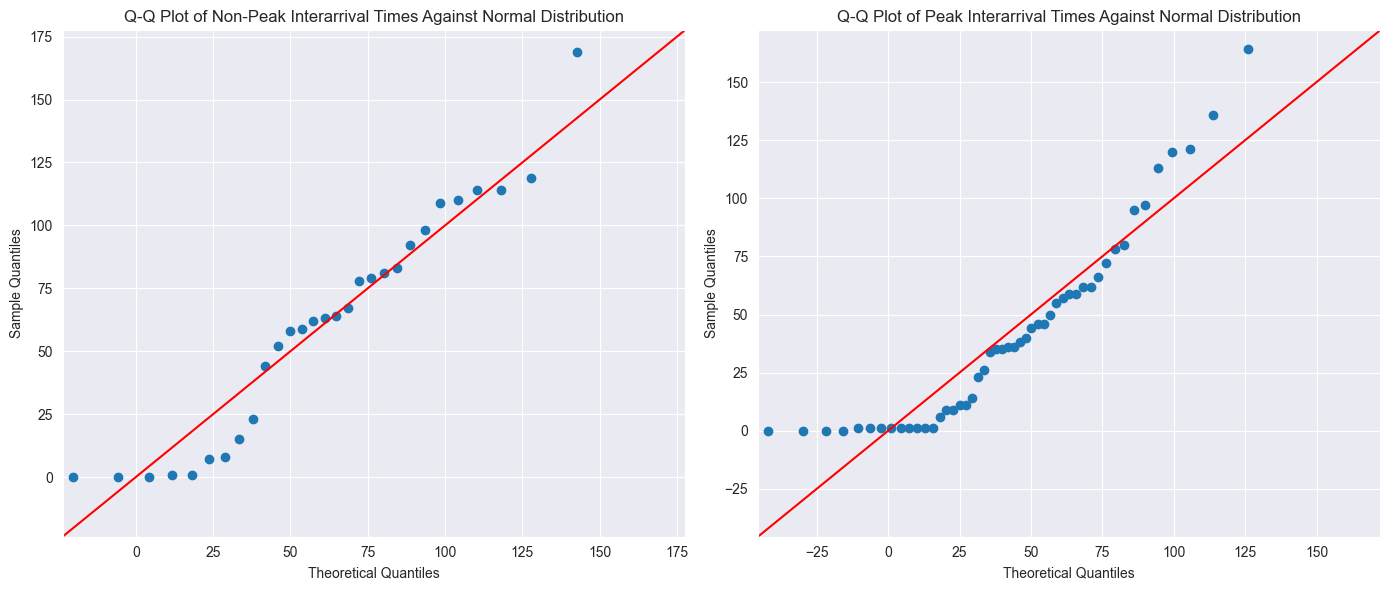

In [37]:
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Fit the normal distribution to the non-peak interarrival times
np_norm_mean, np_norm_std = stats.norm.fit(np_arrival_times['iat'])
print(f"Non-Peak - Mean: {np_norm_mean}, Std: {np_norm_std}")

# Generate a Q-Q plot for non-peak times
sm.qqplot(np_arrival_times['iat'], dist=stats.norm, line='45', loc=np_norm_mean, scale=np_norm_std, ax=axs[0])
axs[0].set_title('Q-Q Plot of Non-Peak Interarrival Times Against Normal Distribution')

# Fit the gamma distribution to the peak interarrival times
norm_mean, norm_std = stats.norm.fit(p_arrival_times['iat'])
print(f"Peak - Mean: {norm_mean}, Std: {norm_std}")

# Generate a Q-Q plot for peak times
sm.qqplot(p_arrival_times['iat'], dist=stats.norm, line='45', loc=norm_mean, scale=norm_std, ax=axs[1])
axs[1].set_title('Q-Q Plot of Peak Interarrival Times Against Normal Distribution')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
